In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [2]:
#load the data
data = pd.read_csv("/kaggle/input/bangladesh-districts-wise-population/city_population.csv")
data.head()

,Name,Abbr.,Division,Established,Native,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
0,Barguna,BRG,Barisal,1984,বরগুনা জেলা,1831,805000,887376,927889,1035596
1,Barishal,BRS,Barisal,1797,বরিশাল জেলা,2785,2299000,2465249,2414729,2634203
2,Bhola,BHO,Barisal,1984,ভোলা জেলা,3403,1532000,1781043,1846351,1980452
3,Jhalokati,JHA,Barisal,1984,ঝালকাঠি জেলা,707,694000,726182,709914,677559
4,Patuakhali,PAT,Barisal,1969,পটুয়াখালী জেলা,3221,1323000,1527628,1596223,1770096


# Data Preprocessing 

- Handling Missing Values: Check for and address missing values in the dataset by imputing missing population values using interpolation techniques
- Handling Duplicate Data: Identify and remove duplicate rows based on unique identifiers to ensure each city's data is unique
- Data Type Conversion: Convert numerical variables (population, area) to appropriate numeric data types, and verify the representation of categorical variables
- Feature Engineering: Create new features like population density by dividing population by area, and derive additional insights from existing features

In [3]:
#check the columns name
data.columns

Index(['Name', 'Abbr.', 'Division', 'Established', 'Native', 'Area (km2)',
       'Population_1991', 'Population_2001', 'Population_2011',
       'Population_2022'],
      dtype='object')

In [4]:
# Rename columns to lowercase
data.columns = data.columns.str.lower()

# Rename the column 'Area (km2)' to 'Area_km2' or any other desired name
data.rename(columns={'area (km2)': 'area_km2'}, inplace=True)

# Verify the new column names
print("\nNew column names:")
print(data.columns)


New column names:
Index(['name', 'abbr.', 'division', 'established', 'native', 'area_km2',
       'population_1991', 'population_2001', 'population_2011',
       'population_2022'],
      dtype='object')


In [5]:
#Checking the data shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

The dataset contains 64 rows and 10 columns


In [6]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             64 non-null     object
 1   abbr.            64 non-null     object
 2   division         64 non-null     object
 3   established      64 non-null     int64 
 4   native           64 non-null     object
 5   area_km2         64 non-null     int64 
 6   population_1991  64 non-null     int64 
 7   population_2001  64 non-null     int64 
 8   population_2011  64 non-null     int64 
 9   population_2022  64 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 5.1+ KB


In [7]:
# Checking the null values in the dataset
data.isna().sum()

name               0
abbr.              0
division           0
established        0
native             0
area_km2           0
population_1991    0
population_2001    0
population_2011    0
population_2022    0
dtype: int64

In [8]:
# Checking the duplicate values in the data
duplicate_values=data.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


In [9]:
# Statistics about the data set
data.describe().style.background_gradient(cmap='bone_r')

,established,area_km2,population_1991,population_2001,population_2011,population_2022
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1937.703125,2306.000000,1741500.000000,2039415.593750,2340193.000000,2653576.765625
std,84.372884,1184.492899,1086475.209543,1415458.432983,1811773.768222,2203057.343932
min,1666.000000,684.000000,246000.000000,311741.000000,404091.000000,495252.000000
25%,1963.500000,1379.250000,1102250.000000,1213935.250000,1283515.750000,1430418.500000
50%,1984.000000,2084.000000,1545500.000000,1829092.500000,2008954.500000,2215751.500000
75%,1984.000000,2960.750000,2160750.000000,2474169.750000,2745524.500000,3020196.250000
max,1984.000000,6116.000000,6164000.000000,9151343.000000,12517360.000000,15210851.000000


## About the DataSet

- Data Size: The dataset comprises 64 rows and 10 columns.
- Data Types: The dataset contains columns of integer (int64) and object data types.
- Missing Values: No missing values were reported, simplifying data cleaning efforts.
- Unique Values: The columns 'native' and 'abbr.' have been removed as they were deemed irrelevant for the final evaluation.

In [10]:
# Remove the 'native' and 'abbr' columns
data.drop(columns=['native', 'abbr.'], inplace=True)

## Feature Engineering

Density:
- Calculate the population density for each year by dividing the population by the area.
- Add the calculated population density values as new columns to your DataFrame.

In [11]:
# Calculate population density for each year
data['density_1991'] = data['population_1991'] / data['area_km2']
data['density_2001'] = data['population_2001'] / data['area_km2']
data['density_2011'] = data['population_2011'] / data['area_km2']
data['density_2022'] = data['population_2022'] / data['area_km2']

# Display the sample of the dataset
data.sample(7)

,name,division,established,area_km2,population_1991,population_2001,population_2011,population_2022,density_1991,density_2001,density_2011,density_2022
46,Jaipurhat,Rajshahi,1983,1012,802000,885909,950440,977150,792.490119,875.404150,939.169960,965.563241
6,Bandarban,Chattogram,1981,4496,246000,311741,404091,495252,54.715302,69.337411,89.877891,110.153915
33,Sherpur,Mymensingh,1984,1365,1179000,1338834,1412601,1552469,863.736264,980.830769,1034.872527,1137.339927
4,Patuakhali,Barisal,1969,3221,1323000,1527628,1596223,1770096,410.742006,474.271344,495.567526,549.548587
12,Feni,Chattogram,1984,990,1158000,1297987,1496139,1697379,1169.696970,1311.097980,1511.251515,1714.524242
48,Natore,Rajshahi,1984,1900,1455000,1591944,1774832,1900213,765.789474,837.865263,934.122105,1000.112105
29,Tangail,Dhaka,1969,3414,3108000,3443497,3749086,4168083,910.369069,1008.640012,1098.150557,1220.879613


# Explore Data Analysis

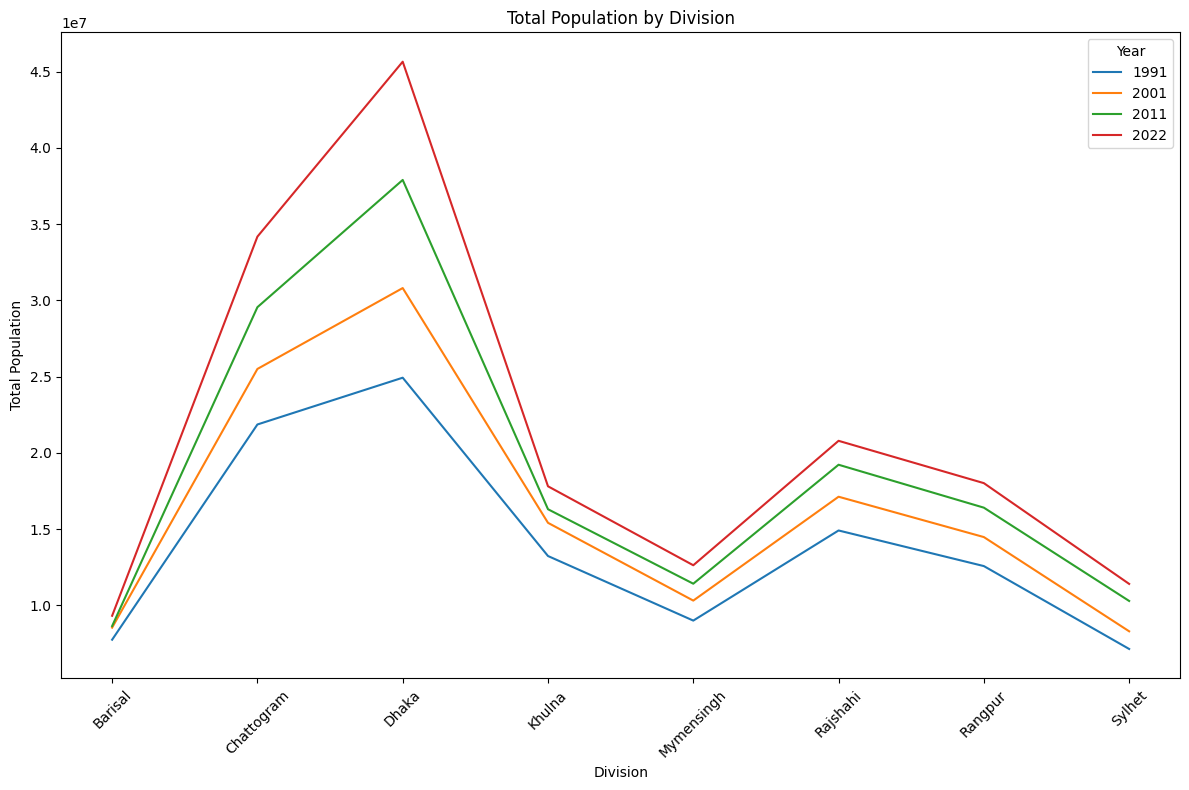

In [12]:
# Extract the years from column names
years = ['1991', '2001', '2011', '2022']

# Group by division and sum the population for each year
division_population = data.groupby('division')[[f'population_{year}' for year in years]].sum()

# Plot the visualization
plt.figure(figsize=(12, 8))
for year in years:
    plt.plot(division_population.index, division_population[f'population_{year}'], label=year)
plt.title('Total Population by Division')
plt.xlabel('Division')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

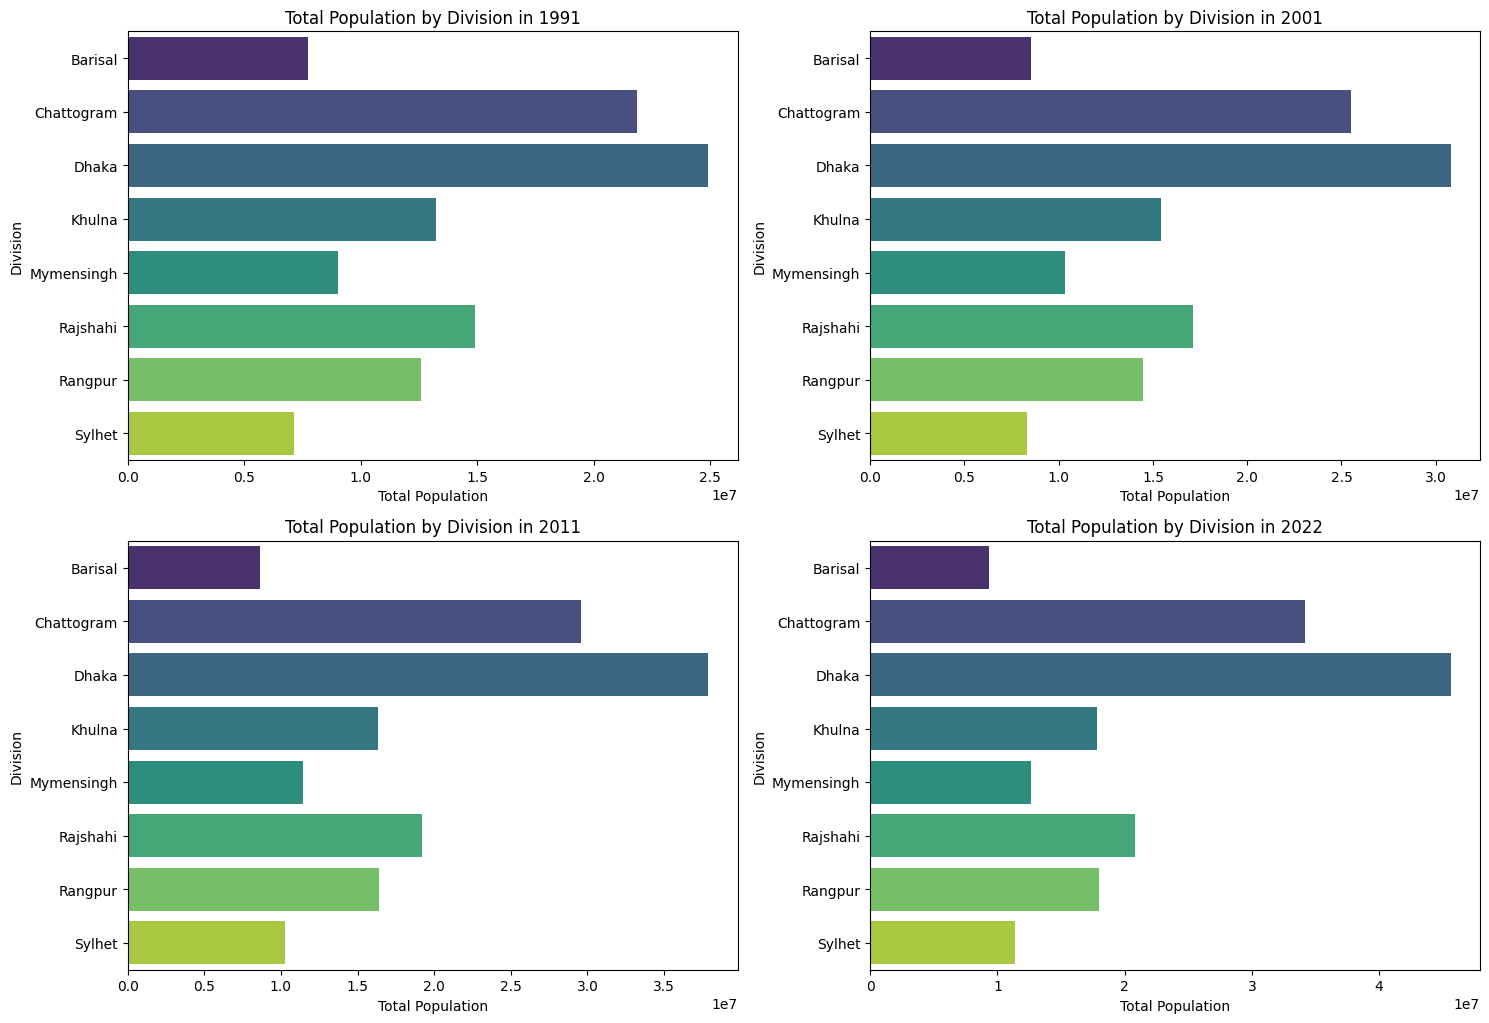

In [13]:
# Create subplots
plt.figure(figsize=(15, 15))

# Loop through each year and create subplots
for i, year in enumerate(years):
    plt.subplot(3, 2, i+1)  # Set the subplot position
    # Group by division and sum the population for the current year
    division_population_year = data.groupby('division')[f'population_{year}'].sum().reset_index()
    
    # Plot the bar plot for the current year
    sns.barplot(x=f'population_{year}', y='division', data=division_population_year, palette='viridis')
    plt.title(f'Total Population by Division in {year}')
    plt.xlabel('Total Population')
    plt.ylabel('Division')

plt.tight_layout()
plt.show()

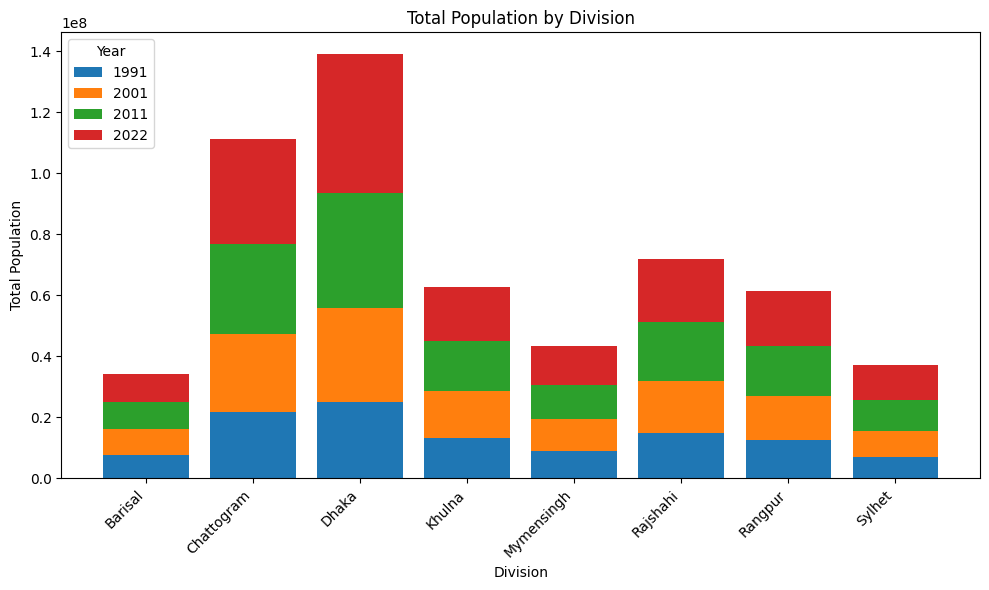

In [14]:
# Calculate the total population for each division for each year
division_population = {}
for year in years:
    division_population[year] = data.groupby('division')[f'population_{year}'].sum()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the bottom values for stacking
bottom = np.zeros(len(data['division'].unique()))

# Iterate over each year and plot a stacked bar for each division
for year in years:
    population_data = division_population[year].values
    divisions = division_population[year].index
    ax.bar(divisions, population_data, bottom=bottom, label=year)
    bottom += population_data

# Set labels and title
ax.set_xlabel('Division')
ax.set_ylabel('Total Population')
ax.set_title('Total Population by Division')
ax.legend(title='Year', loc='upper left')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

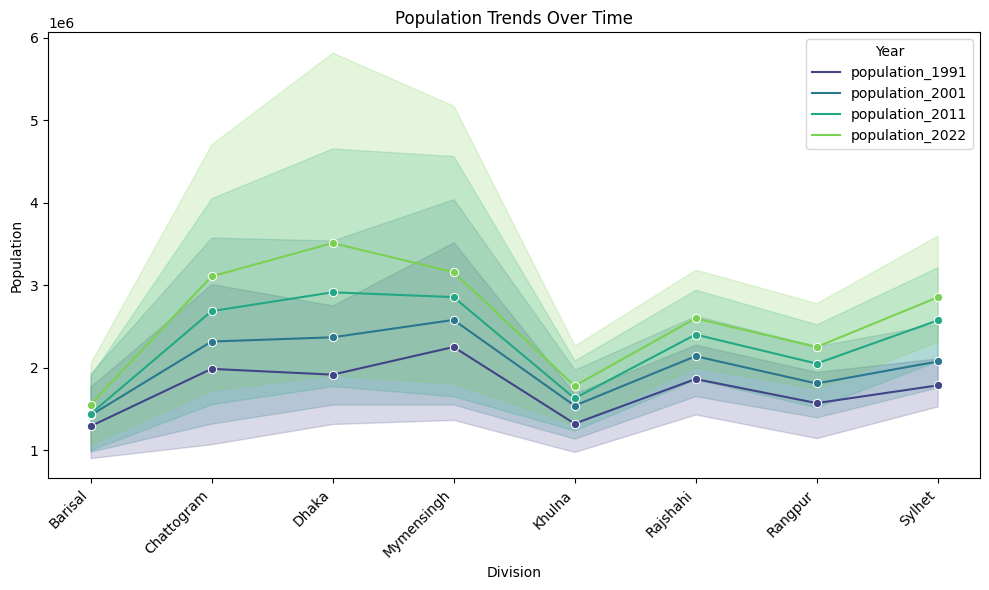

In [15]:
# Extract population data for each year
years = ['population_1991', 'population_2001', 'population_2011', 'population_2022']

population_data = data.melt(id_vars='division', value_vars=years, var_name='Year', value_name='Population')

# Plot population trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=population_data, x='division', y='Population', hue='Year', marker='o', palette='viridis')
plt.title('Population Trends Over Time')
plt.xlabel('Division')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

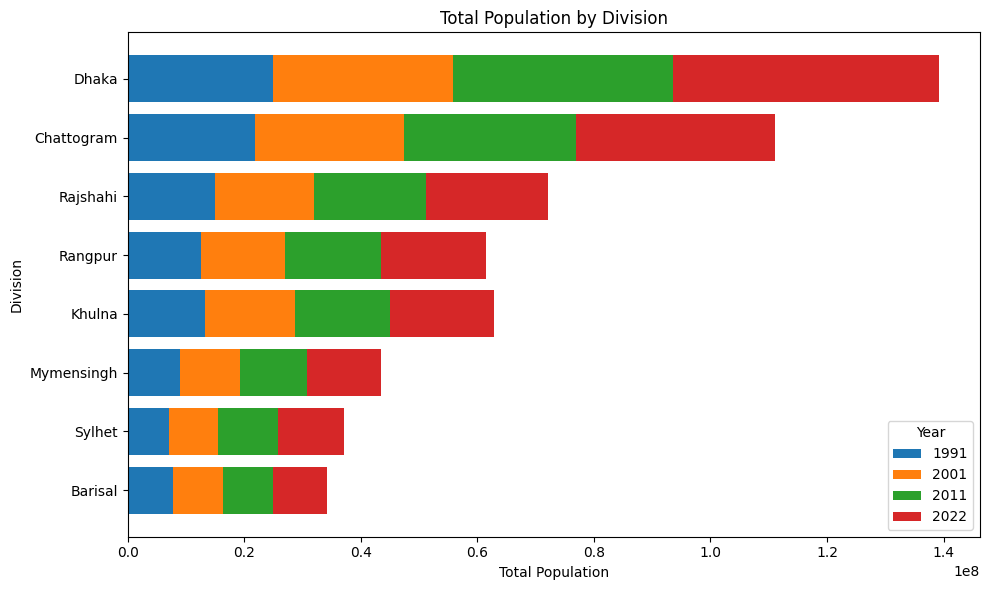

In [16]:
# Extract the years from column names
years = ['1991', '2001', '2011', '2022']

# Calculate the total population for each division for each year
division_population = {}
for year in years:
    division_population[year] = data.groupby('division')[f'population_{year}'].sum()

# Sort divisions based on total population in the last year (2022)
sorted_divisions = sorted(division_population['2022'].items(), key=lambda x: x[1], reverse=False)
sorted_divisions = [division for division, _ in sorted_divisions]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the left values for stacking
left = np.zeros(len(data['division'].unique()))

# Iterate over each year and plot a stacked bar for each division
for year in years:
    population_data = division_population[year].loc[sorted_divisions].values  # Reorder population data based on sorted divisions
    divisions = sorted_divisions
    ax.barh(divisions, population_data, left=left, label=year)  # Use barh for horizontal bars
    left += population_data

# Set labels and title
ax.set_ylabel('Division')  # Set Division as ylabel
ax.set_xlabel('Total Population')  # Set Total Population as xlabel
ax.set_title('Total Population by Division')
ax.legend(title='Year', loc='lower right')

plt.tight_layout()
plt.show()

#### Decision 

Based on the stacked bar plot visualization, it appears that the population in the divisions of Dhaka and Chittagong has indeed experienced significant growth from 1991 to 2022 compared to other divisions. This growth is evident from the increasing height of the stacked bars representing these divisions over the years.

## Population Growth in Districts of Dhaka and Chittagong Divisions

As the population growth rate of Dhaka and Chittagong division is higher. Now let's see in which district of Dhaka and Chittagong division the population is increasing.

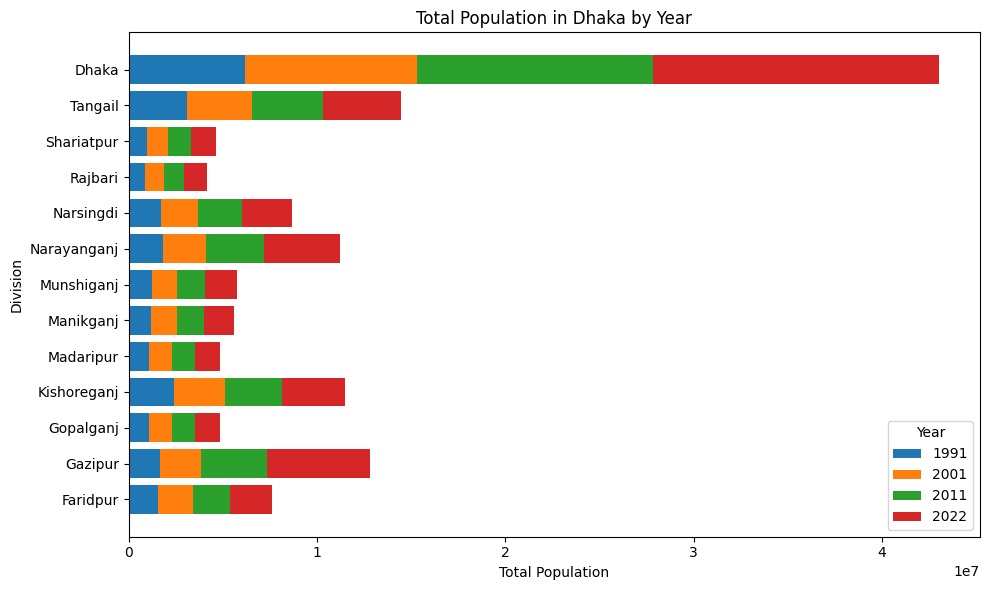

In [17]:
# Filter the data for Chattogram division
dhaka_data = data[data['division'] == 'Dhaka']

# Calculate the maximum population for each division across all years
max_population = {division: dhaka_data[[f'population_{year}' for year in years]].max(axis=1) 
                  for division in dhaka_data['name']}

# Sort divisions based on their maximum population, with Dhaka first
sorted_divisions = sorted(max_population.keys(), key=lambda division: (division != 'Dhaka', max_population[division].max()), reverse=True)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the bottom values for stacking
bottom = np.zeros(len(dhaka_data))

# Iterate over each year and plot a stacked bar for each division
for year in years:
    population_data = dhaka_data.set_index('name').loc[sorted_divisions, f'population_{year}']
    ax.barh(population_data.index, population_data, left=bottom, label=year)
    bottom += population_data

# Set labels and title
ax.set_ylabel('Division')
ax.set_xlabel('Total Population')
ax.set_title('Total Population in Dhaka by Year')
ax.legend(title='Year', loc='lower right')

plt.tight_layout()
plt.show()

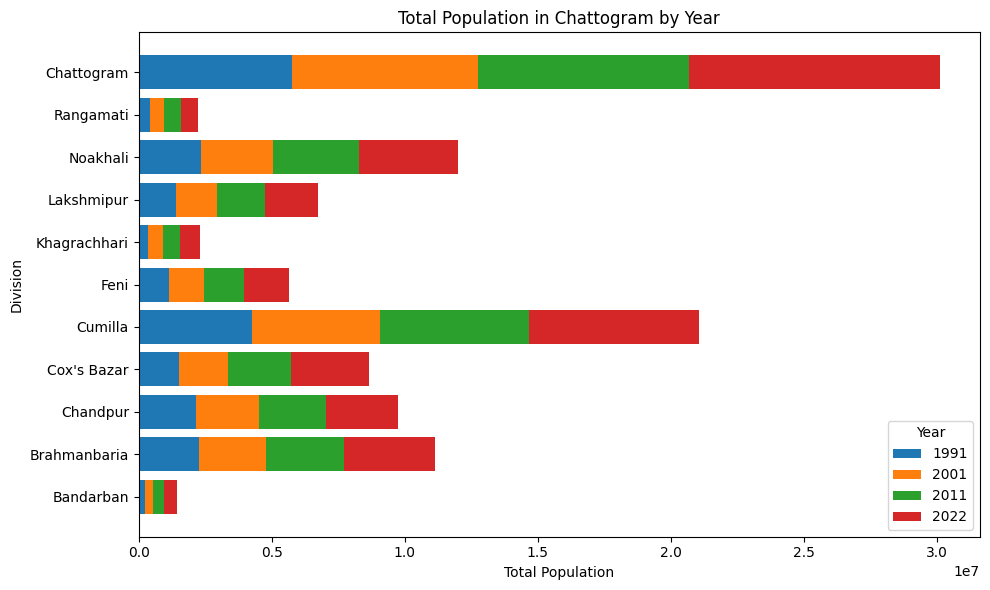

In [18]:
# Filter the data for Chattogram division
chattogram_data = data[data['division'] == 'Chattogram']

# Calculate the maximum population for each division across all years
max_population = {division: chattogram_data[[f'population_{year}' for year in years]].max(axis=1) 
                  for division in chattogram_data['name']}

# Sort divisions based on their maximum population, with Chattogram first
sorted_divisions = sorted(max_population.keys(), key=lambda division: (division != 'Chattogram', max_population[division].max()), reverse=True)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the bottom values for stacking
bottom = np.zeros(len(chattogram_data))

# Iterate over each year and plot a stacked bar for each division
for year in years:
    population_data = chattogram_data.set_index('name').loc[sorted_divisions, f'population_{year}']
    ax.barh(population_data.index, population_data, left=bottom, label=year)
    bottom += population_data

# Set labels and title
ax.set_ylabel('Division')
ax.set_xlabel('Total Population')
ax.set_title('Total Population in Chattogram by Year')
ax.legend(title='Year', loc='lower right')

plt.tight_layout()
plt.show()

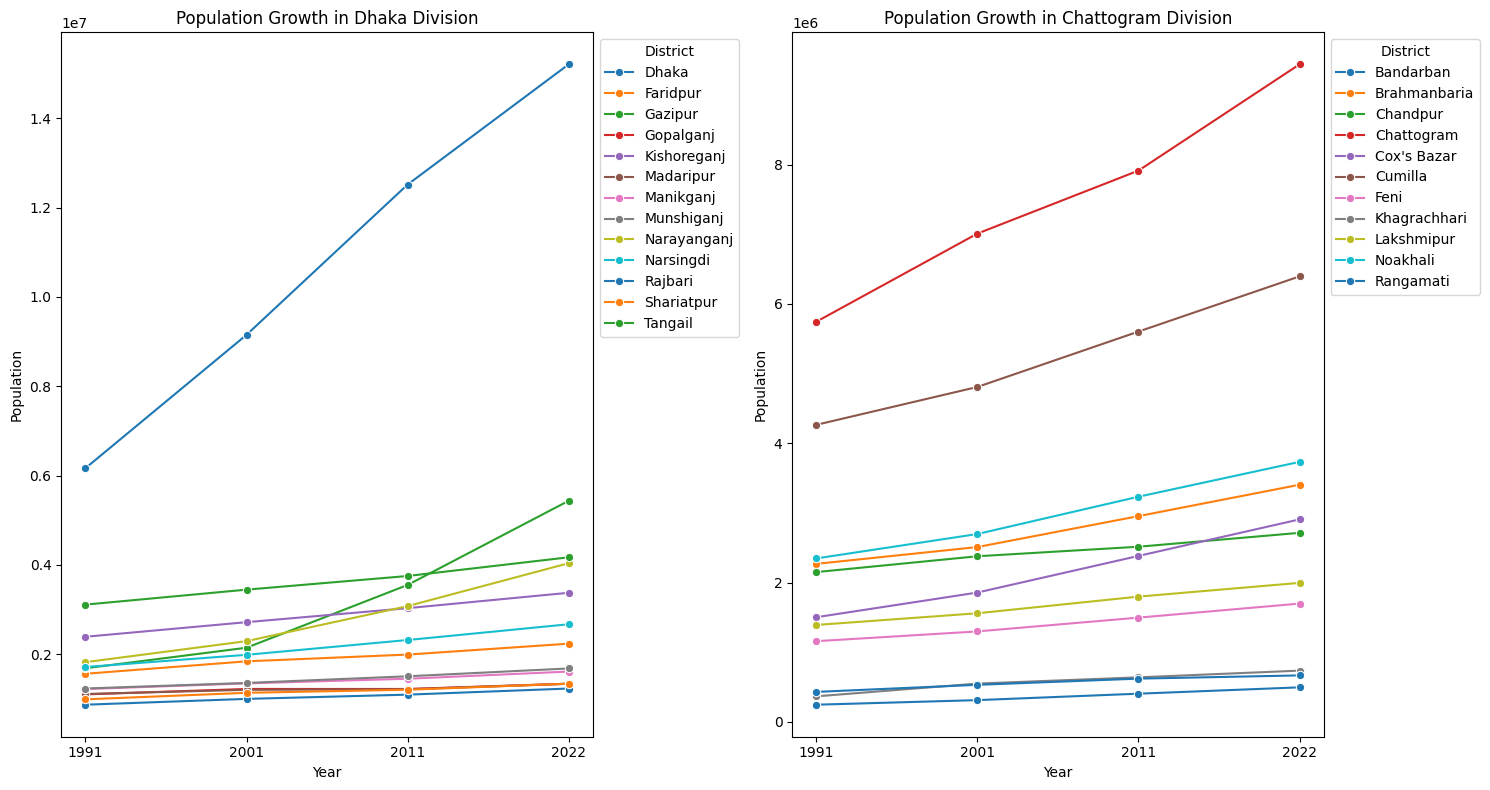

In [19]:
# Filter the data for Dhaka and Chittagong divisions
dhaka_chittagong_data = data[data['division'].isin(['Dhaka', 'Chattogram'])]

# Extract the years from column names
years = ['1991', '2001', '2011', '2022']

# Create subplots for each division
plt.figure(figsize=(15, 8))

# Loop through each division and create a separate plot
for i, division in enumerate(['Dhaka', 'Chattogram']):
    plt.subplot(1, 2, i+1)  # Set the subplot position
    # Filter the data for the current division
    division_data = dhaka_chittagong_data[dhaka_chittagong_data['division'] == division]
    # Loop through each district in the division and plot the population for each year
    for district in division_data['name'].unique():
        district_data = division_data[division_data['name'] == district]
        population = [district_data[f'population_{year}'].values[0] for year in years]
        sns.lineplot(x=years, y=population, label=district, marker='o')
    plt.title(f'Population Growth in {division} Division')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

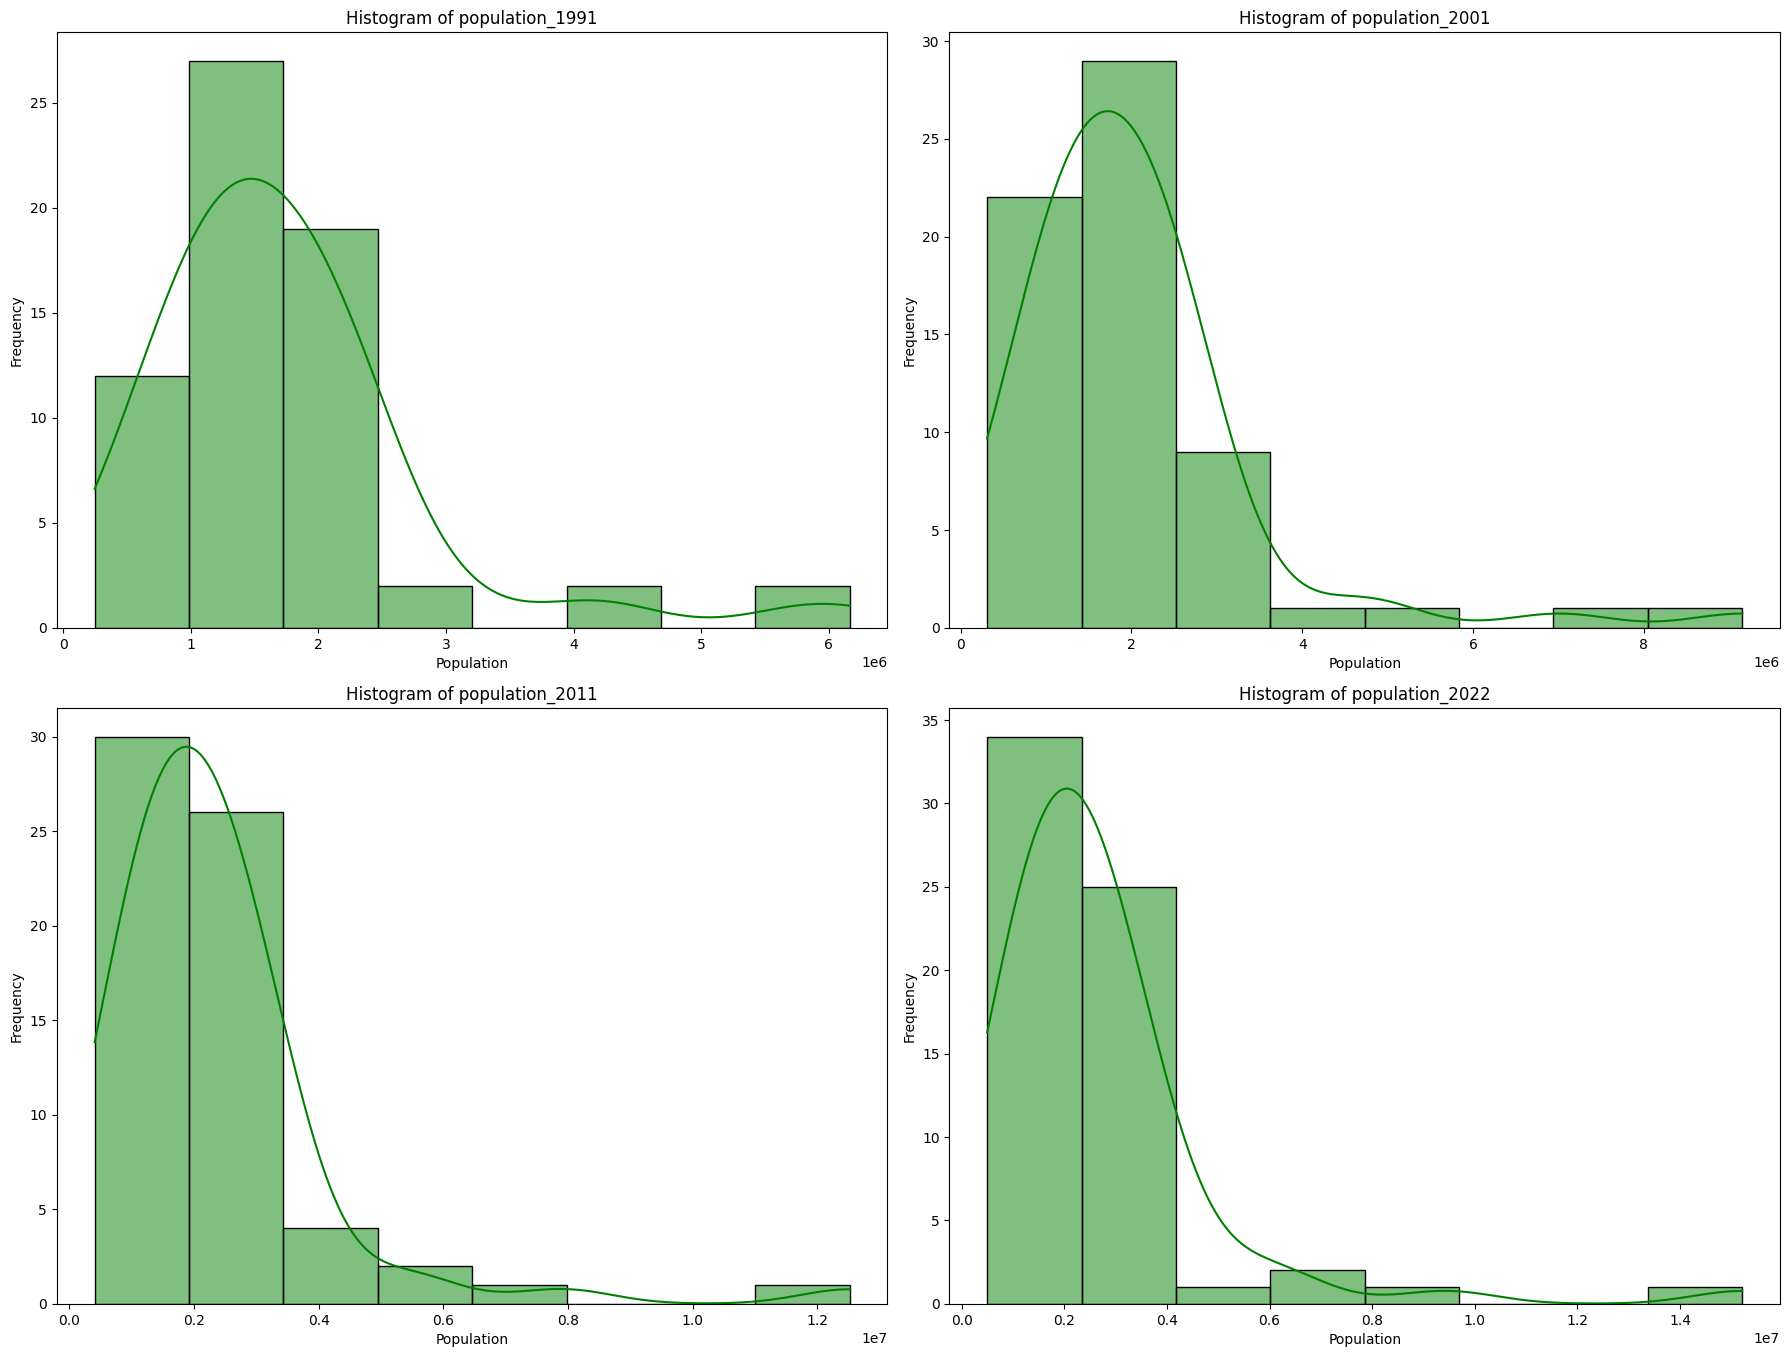

In [20]:
plt.figure(figsize=(18, 20))

columns = ['population_1991', 'population_2001', 'population_2011', 'population_2022']

for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=data, x=col, kde=True, bins=round(np.sqrt(len(data))), color='green')
    plt.xlabel('Population')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

#### Decision
Based on the analysis, it seems that in the Dhaka division, the population is increasing only in the Dhaka district, while in the Chattogram division, two districts, Chattogram and Cumilla, are experiencing population growth.

# Due work

Density and Machine leaning algorithm